In [1]:
# Planar data classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1)

In [3]:
X, Y = load_planar_dataset()

In [4]:
X.shape

(2, 400)

In [5]:
Y.shape

(1, 400)

Visualize the data

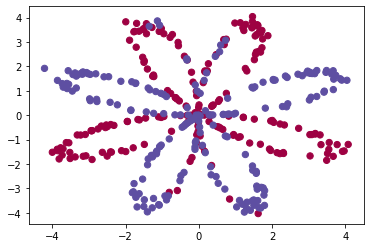

In [6]:
plt.scatter(X[0, :], X[1, :],c=Y[0, :],  s=40, cmap=plt.cm.Spectral)

In [7]:
# X that contains your features (x1, x2)
# Y that contains your labels (red:0, blue:1)

In [8]:
m = X.shape[1]
print("I have m = %d training examples!" % (m))

I have m = 400 training examples!


In [9]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [11]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache
    

In [12]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    
    cost = np.float64((-1/m) * (np.dot(Y, np.log(A2).T) + np.dot(1-Y, np.log(1-A2).T)))
    cost = float(np.squeeze(cost))
                      
    return cost

In [13]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads

In [14]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
        
    }
    
    return parameters

In [15]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost = False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward Propagation
        A2, cache = forward_propagation(X, parameters)
        
        # cost function
        cost = compute_cost(A2, Y, parameters)
        
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # parameter update
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration: %i: %f " %(i, cost))
            
    return parameters
    
    
    

In [16]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [17]:
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost = True)

Cost after iteration: 0: 0.693048 
Cost after iteration: 1000: 0.288083 
Cost after iteration: 2000: 0.254385 
Cost after iteration: 3000: 0.233864 
Cost after iteration: 4000: 0.226792 
Cost after iteration: 5000: 0.222644 
Cost after iteration: 6000: 0.219731 
Cost after iteration: 7000: 0.217504 
Cost after iteration: 8000: 0.219526 
Cost after iteration: 9000: 0.218627 


Text(0.5, 1.0, 'Decision boundary for hidden layer size 4')

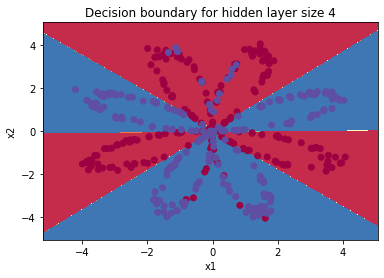

In [18]:
#plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision boundary for hidden layer size " + str(4))

In [19]:
# Accuracy
predictions = predict(parameters, X)
print(f'Accuracy: {float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)* 100)} % ')

Accuracy: 90.5 % 


Tunning Hidden Layer Size

Accuracy: 67.5 % 
Accuracy: 67.25 % 
Accuracy: 90.75 % 
Accuracy: 90.5 % 
Accuracy: 91.25 % 
Accuracy: 90.5 % 
Accuracy: 90.25 % 


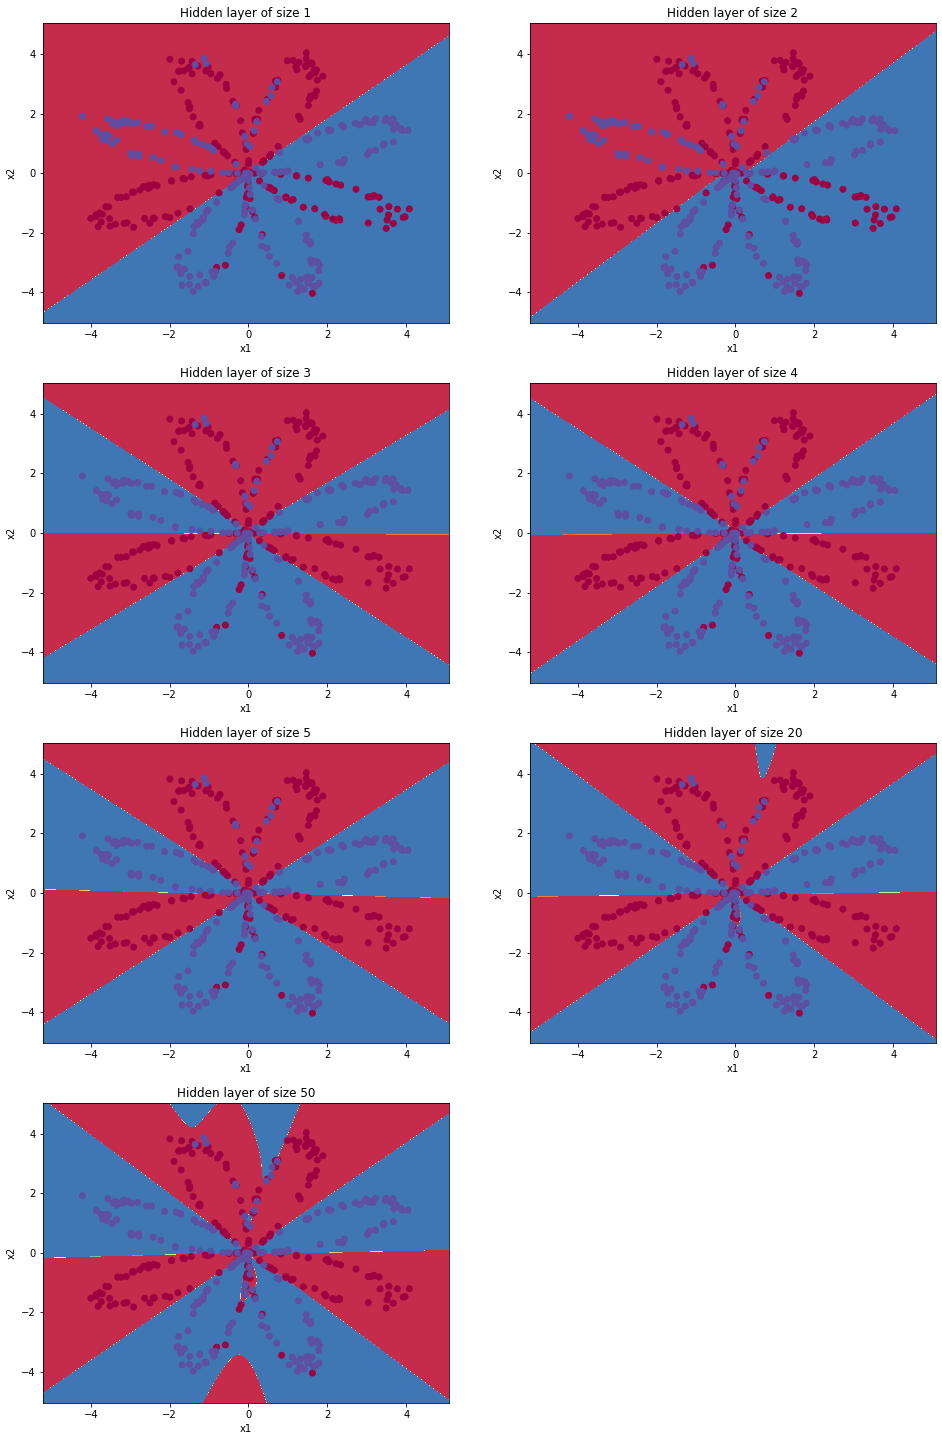

In [21]:
plt.figure(figsize=(16, 32))
hidden_layer_size = [1, 2, 3, 4, 5, 20, 50]
for i, n_h, in enumerate(hidden_layer_size):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden layer of size %d' %n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    print(f'Accuracy: {float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)* 100)} % ')
    